In [5]:
#Used for data manipulation
import numpy as np
import xarray as xr
from scipy import stats 
import pandas as pd
import math as mt
#Others
import time
#Data visualization
import datetime
from dateutil.rrule import rrule, DAILY, HOURLY
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
from xhistogram.xarray import histogram


In [2]:
#Time to get the data from AWS; download locally***
file = 'gdp_v2.00.nc'
#url_path = 'https://noaa-oar-hourly-gdp-pds.s3.amazonaws.com/latest/'
#ds = xr.open_dataset(url_path+file+'#mode=bytes')
url_path = '/Users/19082/Desktop/Drifter/'
ds = xr.open_dataset(url_path+file)

c:\Users\19082\miniconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
ds

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    longitude              (obs) float32 ...
    latitude               (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/53)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

Obtain and plot SST Data:

In [3]:
bin1 = '2000-09-03'
bin2 = '2001-03-03'
data_subset_sst = ds[['time', 'flg_sst']].where((ds.time > np.datetime64(bin1)) & 
                                                   (ds.time < np.datetime64(bin2)) & 
                                                   (ds.flg_sst ==5), drop=True)

In [8]:
sst11 = histogram(data_subset_sst['time'], bins = pd.date_range(bin1, bin2, freq= "10D"))

ValueError: The number of bin definitions doesn't match the number of args

(array([22489., 23602., 23998., 24875., 24637., 24214., 24304., 24001.,
        24060., 23778., 25439., 25221., 26585., 28922., 28875., 25852.,
        25399., 27761.]),
 array([11203., 11213., 11223., 11233., 11243., 11253., 11263., 11273.,
        11283., 11293., 11303., 11313., 11323., 11333., 11343., 11353.,
        11363., 11373., 11383.]),
 <BarContainer object of 18 artists>)

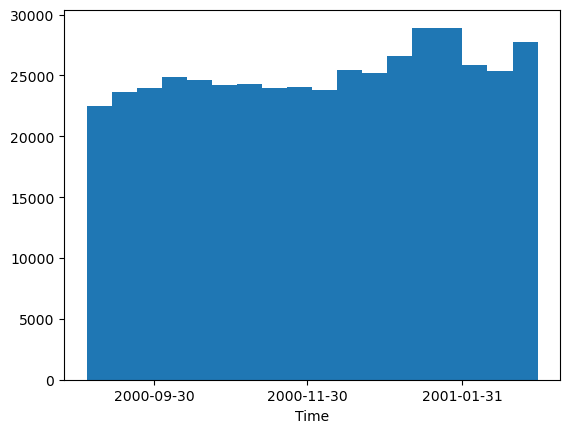

In [7]:

xticks = pd.date_range(bin1, bin2, freq= "2M") 
bins = pd.date_range(bin1, bin2, freq= "10D")  # 2 year bins
data_subset_sst['time'].plot.hist(xticks = xticks, bins = bins)

Obtain and plot sst2 data:

In [9]:

data_subset_sst2 = ds[['time', 'flg_sst2']].where((ds.time > np.datetime64(bin1)) & 
                                                   (ds.time < np.datetime64(bin2)) & 
                                                   (ds.flg_sst2 ==5), drop=True)

(array([ 9383., 10108., 10263.,  9944., 10177., 10235., 10946., 10620.,
        10925., 10552., 11861., 11630., 12203., 13613., 13803., 12209.,
        12444., 14257.]),
 array([11203., 11213., 11223., 11233., 11243., 11253., 11263., 11273.,
        11283., 11293., 11303., 11313., 11323., 11333., 11343., 11353.,
        11363., 11373., 11383.]),
 <BarContainer object of 18 artists>)

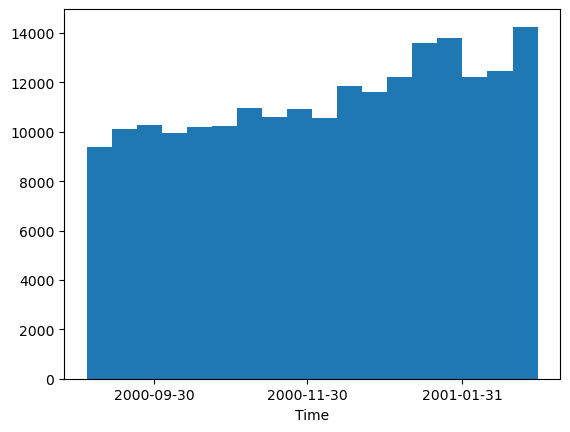

In [11]:
xticks = pd.date_range(bin1, bin2, freq= "2M") 
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
data_subset_sst2['time'].plot.hist(xticks = xticks, bins = bins)

Obtain and plot pos+velo data:

In [21]:
data_subset_vn = ds[['time', 'vn']].where((ds.time > np.datetime64(bin1)) & 
                                            (ds.time < np.datetime64(bin2)) &
                                            (ds.vn.isnull() == False), drop=True)

In [1]:
dvn = data_subset_vn['time'] / 1.e5


NameError: name 'data_subset_vn' is not defined

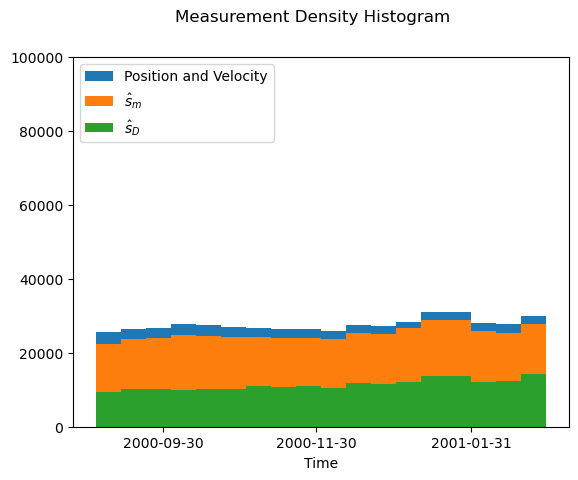

In [15]:
xticks = pd.date_range(bin1, bin2, freq= "2M") #
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
ylim = [0, 1.e5]
dvn = data_subset_vn['time'] / 1.e5
n, bins, patches = data_subset_vn['time'].plot.hist(xticks = xticks, bins = bins, label = "Position and Velocity", ylim = ylim)
n1, bins1, patches1 = data_subset_sst['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{m}$", ylim = ylim)
n2, bins2, batches2 = data_subset_sst2['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{D}$", ylim = ylim)
plt.suptitle("Measurement Density Histogram")
plt.legend(loc='upper left')

In [3]:
datavn = ds.vn
np.histogram(ds.vn.values)
a = np.histogram(ds.vn, 100, (-1, 1))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([6484., 6494., 6504., 6514., 6524., 6534., 6544., 6554., 6564.,
        6574., 6584., 6594., 6604., 6614., 6624., 6634., 6644., 6654.,
        6664., 6674., 6684., 6694., 6704., 6714., 6724., 6734., 6744.,
        6754., 6764., 6774., 6784., 6794., 6804., 6814., 6824., 6834.,
        6844., 6854., 6864., 6874., 6884., 6894., 6904., 6914., 6924.,
        6934., 6944., 6954., 6964., 6974., 6984., 6994., 7004., 7014.,
        7024., 7034., 7044., 7054., 7064., 7074., 7084., 7094., 7104.,
        7

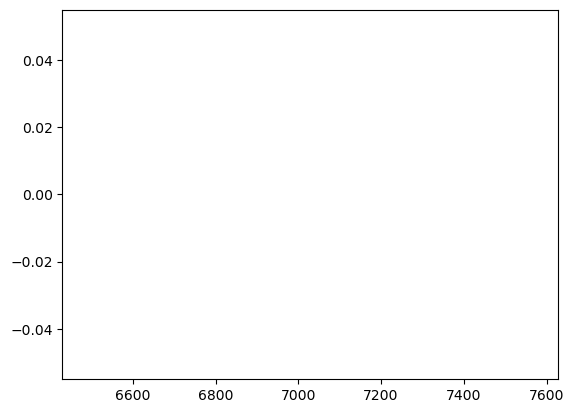

In [24]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1997, 10, 3)
bins = rrule(HOURLY, dtstart = bin1, until = bin2)
timebin = pd.date_range("1987-10-3", "1990-10-3", freq = '10D')
plt.hist(ds.vn, bins = timebin )


Loops:

In [12]:
data

<xarray.DataArray 'sst' (obs: 165754333)>
array([293.884, 293.809, 293.757, ...,     nan,     nan,     nan],
      dtype=float32)
Coordinates:
    longitude  (obs) float32 -17.74 -17.75 -17.74 ... -30.27 -30.32 -30.37
    latitude   (obs) float32 14.75 14.76 14.77 14.78 ... 66.82 66.82 66.81 66.8
    time       datetime64[ns] 2000-10-03T01:00:00
    ids        (obs) int64 101143 101143 101143 ... 9929870 9929870 9929870
Dimensions without coordinates: obs
Attributes:
    long_name:  Fitted sea water temperature
    units:      Kelvin
    comments:   Estimated near-surface sea water temperature from drifting bu...

In [41]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 3)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
a = rrule(HOURLY, dtstart = bin1, until = bin2)
for ds['time'] in a:
    #if ds.time(ds.flg_sst==5):
    try:
        ds.time.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    except IndexError:
        pass
    i = i + datetime.timedelta(hours = 1)

In [50]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 3)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
a = rrule(HOURLY, dtstart = bin1, until = bin2)
for ds['time'] in a:
    if(ds.time.where(ds.flg_sst==5).all):
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    i = i + datetime.timedelta(hours = 1)

In [51]:
ssthist

{datetime.datetime(2000, 10, 3, 1, 0): 1,
 datetime.datetime(2000, 10, 3, 2, 0): 1,
 datetime.datetime(2000, 10, 3, 3, 0): 1}

In [26]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 6, hour = 1)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    try:
        ds.time.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    except IndexError:
        pass
    i = i + datetime.timedelta(hours = 1)

In [5]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 6, hour = 1)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    if(ds.flg_sst ==5):
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
        i = i + datetime.timedelta(hours = 1)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 3)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    if(ds.time.where(ds.flg_sst==5).all):  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    i = i + datetime.timedelta(hours = 1)

In [37]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 6)
i = bin1
a = ds.time.where(ds.flg_sst==5)
for a in rrule(HOURLY, dtstart = bin1, until = bin2):  
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
        i = i + datetime.timedelta(hours = 1)


In [57]:
ssthist

{datetime.datetime(2000, 10, 3, 1, 0): 1,
 datetime.datetime(2000, 10, 3, 2, 0): 1,
 datetime.datetime(2000, 10, 3, 3, 0): 1,
 datetime.datetime(2000, 10, 3, 4, 0): 1,
 datetime.datetime(2000, 10, 3, 5, 0): 1,
 datetime.datetime(2000, 10, 3, 6, 0): 1,
 datetime.datetime(2000, 10, 3, 7, 0): 1,
 datetime.datetime(2000, 10, 3, 8, 0): 1,
 datetime.datetime(2000, 10, 3, 9, 0): 1,
 datetime.datetime(2000, 10, 3, 10, 0): 1,
 datetime.datetime(2000, 10, 3, 11, 0): 1,
 datetime.datetime(2000, 10, 3, 12, 0): 1,
 datetime.datetime(2000, 10, 3, 13, 0): 1,
 datetime.datetime(2000, 10, 3, 14, 0): 1,
 datetime.datetime(2000, 10, 3, 15, 0): 1,
 datetime.datetime(2000, 10, 3, 16, 0): 1,
 datetime.datetime(2000, 10, 3, 17, 0): 1,
 datetime.datetime(2000, 10, 3, 18, 0): 1,
 datetime.datetime(2000, 10, 3, 19, 0): 1,
 datetime.datetime(2000, 10, 3, 20, 0): 1,
 datetime.datetime(2000, 10, 3, 21, 0): 1,
 datetime.datetime(2000, 10, 3, 22, 0): 1,
 datetime.datetime(2000, 10, 3, 23, 0): 1,
 datetime.datetime(2

In [ ]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 10, 13)
ssthist = {}
sst2hist = {}
posvelohist = {}
for i in rrule(DAILY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    try:
        ds.sst.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[daterange] =  for 10 days
    except IndexError:
        pass
    try:
        ds.sst2.where(ds.flg_sst2==5)
        sst2hist[i] = sst2hist.get(i, 0) + 1
    except IndexError:
        pass
    try:
        ds.longitude
        posvelohist[i] = posvelohist.get(i, 0) + 1
    except IndexError:
        pass
    bin1 = bin1 + datetime.timedelta(days = 10)

        #Took 42 seconds for 1 day...
        #Let run for 3 minutes and got through 4 tallies

In [ ]:
timebin = pd.date_range(start='1987-10-03T13:00:00.000000000', end='2020-06-30T23:00:00.000000000', freq='10D')
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 10, 4)
ssthist = {}
sst2hist = {}
posvelohist = {}
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):
    try:
        ds.sst.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[bin1] = ssthist.get(bin1, 0) + 1  #trying to get ssthist[date] = ... 
    except IndexError:
        pass
    try:
        ds.sst2.where(ds.flg_sst2==5)
        sst2hist[bin1] = sst2hist.get(bin1, 0) + 1
    except IndexError:
        pass
    try:
        ds.longitude
        posvelohist[bin1] = posvelohist.get(bin1, 0) + 1
    except IndexError:
        pass
    

In [7]:
plt.hist(ds['vn'].values)

MemoryError: Unable to allocate 632. MiB for an array with shape (165754333,) and data type float32

In [7]:
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 10, 13)
ds.sel(time = "1987-10-3")

KeyError: "no index found for coordinate 'time'"